### Import libraries

In [21]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import statistics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

### Pick and load one image from a directory

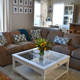

In [22]:
im=Image.open(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\test\0.png",'r')
im

im= im.resize((80,80))
im

### Transform the list of pixels in a single image
example:

[210,111,212] ---> [233] [111] [212]


In [23]:

pix_val = list(im.getdata())
r_list=[]
g_list=[]
b_list=[]
for x in pix_val:
    for z in x:
        if z==x[0]:
            r_list.append(z)
        elif z==x[1]:
            g_list.append(z)
        elif z==x[2]:
            b_list.append(z)
            
#I've used a function of Image module called getdata() to extract the pixel values.
#This scans the image horizontally from left to right starting at the top-left corner. 
#The values got from each pixel is then added into a list. 
#Finally what we get is a list with each pixel value as a set of 4 values(R,G,B.A).

### Pick and load all the images from the directory and transform the list of pixels

In [26]:
size_x=80 # size
size_y=80 # size


reshaped_images_clean_train= [] #np.zeros((size_x,size_y,3))
reshaped_images_messy_train= []
reshaped_images_clean_val= []
reshaped_images_messy_val= []
reshaped_images_test= []
lists_xs_tot=[]
def load_images_from_folder(folder):
    images = []
    global size_x,size_y 
    for item in list_images:
        img_iterative = os.path.join(folder,item)
        for filename in os.listdir(img_iterative):    
            img = os.path.join(img_iterative,filename)
            if img is not None:      
                im=Image.open(img,'r')
                im=im.resize((size_x,size_y)) #size
                pix_val=list(im.getdata())
                #print(pix_val)
                #print(np.array(pix_val).reshape((size_x,size_y,3)))
                #print(np.array(pix_val).reshape((size_x,size_y,3)).shape)
                r_list=[]
                g_list=[]
                b_list=[]  
                lists_xs=[]
                for x in pix_val:
                    list_x=list(x)
                    lists_xs.append(list_x)
                    for z in x:
                        if z==x[0]:
                            r_list.append(z)
                        elif z==x[1]:
                            g_list.append(z)
                        elif z==x[2]:
                            b_list.append(z) 
                #np.array(lists_xs).reshape((size_x,size_y,3))            
                #lists_xs_tot.append(lists_xs)
                rgb_list=r_list+g_list+b_list 
                reshaped_image=np.array(rgb_list).reshape((size_x,size_y,3)).tolist()
                rgb_list.insert(0,item)
                images.append(rgb_list) 
                #used for CNNs
                if item=='clean_train':
                    reshaped_images_clean_train.append(reshaped_image)
                elif item=='messy_train': 
                    reshaped_images_messy_train.append(reshaped_image)
                elif item=='clean_val':
                    reshaped_images_clean_val.append(reshaped_image)
                elif  item=='messy_val':
                    reshaped_images_messy_val.append(reshaped_image)
                elif item =='test':
                    reshaped_images_test.append(reshaped_image)
                               
                
    return images
folder="C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy"

list_images=['clean_train','clean_val','messy_train','messy_val','test']
result=load_images_from_folder(folder)

#print(x_val)

### Load the dataset as a dataframe

In [29]:
import pandas as pd
dataset=pd.DataFrame(result)

In [30]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,19191,19192,19193,19194,19195,19196,19197,19198,19199,19200
0,clean_train,128,114,108,103,95,93,97,114,114,...,40,31,27,26,28,30,34,42,40,40
1,clean_train,178,177,178,180,180,181,182,182,182,...,86,96,81,64,117,132,122,110,111,124
2,clean_train,216,218,224,225,213,188,181,210,229,...,95,98,96,94,84,78,86,82,86,87
3,clean_train,218,215,215,215,213,211,201,201,210,...,54,56,56,58,52,54,55,50,53,55
4,clean_train,150,155,158,161,161,161,163,163,166,...,12,10,10,9,8,7,7,7,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,test,210,211,212,212,213,213,213,213,214,...,131,140,149,149,154,84,21,20,123,157
218,test,191,189,189,189,188,188,185,186,186,...,199,210,215,217,218,240,248,250,252,254
219,test,120,94,91,83,147,147,99,103,105,...,2,1,4,11,15,19,24,26,29,35
220,test,173,171,168,163,160,156,152,148,148,...,26,32,33,29,35,28,25,21,29,33


### Save the dataset

In [8]:
dataset.to_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\raw_dataset_80pix.pkl")

### Data Preprocessing

In [9]:
clean_train=dataset[dataset[0]=='clean_train']
clean_val=dataset[dataset[0]=='clean_val']
messy_train=dataset[dataset[0]=='messy_train']
messy_val=dataset[dataset[0]=='messy_val']
test=dataset[dataset[0]=='test']
train_dataset=pd.concat([clean_train,messy_train])
val_dataset=pd.concat([clean_val,messy_val])
test_dataset=pd.DataFrame(test)
train_dataset.replace('clean_train','clean',inplace=True)
train_dataset.replace('messy_train','messy',inplace=True)
val_dataset.replace('clean_val','clean',inplace=True)
val_dataset.replace('messy_val','messy',inplace=True)
test_dataset.replace('clean_val','clean',inplace=True)
test_dataset.replace('messy_val','messy',inplace=True)
test_dataset.iloc[: , 0]=test_dataset.iloc[: , 0].astype(str)
train_dataset.iloc[: , 0]=train_dataset.iloc[: , 0].astype(str)
val_dataset.iloc[: , 0]=val_dataset.iloc[: , 0].astype(str)
train_dataset.dtypes

0        object
1         int64
2         int64
3         int64
4         int64
          ...  
19196     int64
19197     int64
19198     int64
19199     int64
19200     int64
Length: 19201, dtype: object

In [10]:
train_dataset.to_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\train_dataset_raw_80pix.csv")
val_dataset.to_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\val_dataset_raw_80pix.csv")
test_dataset.to_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\test_dataset_raw_80pix.csv")

In [11]:
size=(len(train_dataset.columns)-1)/3
rgb=('Red','Green','Blue')
columns=[]
for colour in rgb:
    for num in range(1,int(size+1)):
        if colour=='Red'and num==1:
            columns.append(('label', num))
        columns.append((colour, num))
train_dataset.columns = pd.MultiIndex.from_tuples(columns, names=['Variables','Number'])
val_dataset.columns = pd.MultiIndex.from_tuples(columns, names=['Variables','Number'])
test_dataset.columns = pd.MultiIndex.from_tuples(columns, names=['Variables','Number'])
train_dataset['label']=train_dataset['label'].astype(str)
train_dataset['Red']=train_dataset['Red'].astype('int')
train_dataset['Blue']=train_dataset['Blue'].astype('int')
train_dataset['Green']=train_dataset['Green'].astype('int')
train_dataset

Variables  label  Red                                          ... Blue       \
Number      1    1    2    3    4    5    6    7    8    9     ... 6391 6392   
0          clean  128  114  108  103   95   93   97  114  114  ...   40   31   
1          clean  178  177  178  180  180  181  182  182  182  ...   86   96   
2          clean  216  218  224  225  213  188  181  210  229  ...   95   98   
3          clean  218  215  215  215  213  211  201  201  210  ...   54   56   
4          clean  150  155  158  161  161  161  163  163  166  ...   12   10   
..           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
197        messy  171  166  168  171  172  175  174  172  168  ...  110  109   
198        messy   30  107  107  157  204  227  218  218  222  ...  222  222   
199        messy  214  230  189  150  154  156  158  159  159  ...  177  159   
200        messy   57   62   68   76   86   96  109  122  134  ...  232  168   
201        messy   94   62   62   27   20   21   20   21   20  ...    5    6   

Variables                                          
Number    6393 6394 6395 6396 6397 6398 6399 6400  
0           27   26   28   30   34   42   40   40  
1           81   64  117  132  122  110  111  124  
2           96   94   84   78   86   82   86   87  
3           56   58   52   54   55   50   53   55  
4           10    9    8    7    7    7    7    6  
..         ...  ...  ...  ...  ...  ...  ...  ...  
197        109  108  106  105  105  101   94   63  
198        222  221  222  220  219  222  223  223  
199        151   92   95  103   93   95   63   41  
200         17   78  188  178  123   79   76  101  
201          7    7    7   13    8    8   10   15  

[192 rows x 19201 columns]

### Save the final dataset

In [12]:
train_dataset.to_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\train_dataset_80pix.csv")
val_dataset.to_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\val_dataset_80pix.csv")
test_dataset.to_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\test_dataset_80pix.csv")

### Read the final dataset

In [31]:
train_dataset=pd.read_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\train_dataset_80pix.csv")
val_dataset=pd.read_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\val_dataset_80pix.csv")
test_dataset=pd.read_pickle(r"C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy\test_dataset_80pix.csv")

In [32]:
train_dataset

Variables  label  Red                                          ... Blue       \
Number      1    1    2    3    4    5    6    7    8    9     ... 6391 6392   
0          clean  128  114  108  103   95   93   97  114  114  ...   40   31   
1          clean  178  177  178  180  180  181  182  182  182  ...   86   96   
2          clean  216  218  224  225  213  188  181  210  229  ...   95   98   
3          clean  218  215  215  215  213  211  201  201  210  ...   54   56   
4          clean  150  155  158  161  161  161  163  163  166  ...   12   10   
..           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
197        messy  171  166  168  171  172  175  174  172  168  ...  110  109   
198        messy   30  107  107  157  204  227  218  218  222  ...  222  222   
199        messy  214  230  189  150  154  156  158  159  159  ...  177  159   
200        messy   57   62   68   76   86   96  109  122  134  ...  232  168   
201        messy   94   62   62   27   20   21   20   21   20  ...    5    6   

Variables                                          
Number    6393 6394 6395 6396 6397 6398 6399 6400  
0           27   26   28   30   34   42   40   40  
1           81   64  117  132  122  110  111  124  
2           96   94   84   78   86   82   86   87  
3           56   58   52   54   55   50   53   55  
4           10    9    8    7    7    7    7    6  
..         ...  ...  ...  ...  ...  ...  ...  ...  
197        109  108  106  105  105  101   94   63  
198        222  221  222  220  219  222  223  223  
199        151   92   95  103   93   95   63   41  
200         17   78  188  178  123   79   76  101  
201          7    7    7   13    8    8   10   15  

[192 rows x 19201 columns]

### PCA

In [34]:
train_dataset['label']=train_dataset['label'].replace('clean',1)#,inplace=True)
train_dataset['label']=train_dataset['label'].replace('messy',0)#,inplace=True)
train_dataset 
val_dataset['label']=val_dataset['label'].replace('clean',1)
val_dataset['label']=val_dataset['label'].replace('messy',0)

test_dataset['label']=test_dataset['label'].replace('clean',1)#,inplace=True)
test_dataset['label']=test_dataset['label'].replace('messy',0)#,inplace=True)


cat_encoder=OneHotEncoder()
cat_features_1hot=cat_encoder.fit_transform(train_dataset['label'])#.to_array()


scaler=StandardScaler()
train_dataset_x=scaler.fit_transform(train_dataset.iloc[:,1:])
val_dataset_x=scaler.fit_transform(val_dataset.iloc[:,1:])
test_dataset_x=scaler.fit_transform(test_dataset.iloc[:,1:])

#  another way to compute pca
pca = PCA(n_components=0.99) 
train_dataset_pca = pca.fit_transform(train_dataset_x)
input_shape=train_dataset_pca.shape[1]
val_dataset_pca = pca.transform(val_dataset_x)
#pca.singular_values_
#train_dataset_pca

### Train the model and predict the test images with an ANN


In [17]:
tf.random.set_seed(79)
opt = keras.optimizers.Adam(learning_rate=0.0000004, beta_1=0.8,beta_2=0.999)
model=keras.models.Sequential([keras.layers.Flatten(input_shape=[input_shape,1]),
                               keras.layers.BatchNormalization(),
                               keras.layers.Dropout(rate=0.2),
                               keras.layers.Dense(6000,activation='elu'
                                                  ,kernel_initializer='glorot_normal'
                                                 #,kernel_regularizer=keras.regularizers.l2(0.1)
                                                 ),
                               #keras.layers.BatchNormalization(),
                               keras.layers.Dropout(rate=0.15),
                               keras.layers.Dense(1000,activation='elu'
                                                  ,kernel_initializer='GlorotNormal'
                                               #  ,kernel_regularizer=keras.regularizers.l2(0.02)
                                                 ),
                               keras.layers.BatchNormalization(),
                               keras.layers.Dropout(rate=0.05),
                               keras.layers.Dense(32,activation='elu'
                                                  ,kernel_initializer='glorot_normal'
                                                 #,kernel_regularizer=keras.regularizers.l2(0.1)
                                                 ),
                               #keras.layers.BatchNormalization(),
                               #keras.layers.Dropout(rate=0.21),
                               keras.layers.Dense(1,activation='sigmoid')])
model.summary()
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
root_logdir=os.path.join(os.curdir,'my_logs')
def get_run_logdir():
    run_id=time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir,run_id)
run_logdir=get_run_logdir()
tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=358,restore_best_weights=True)
history=model.fit(np.asarray(train_dataset_pca).reshape(train_dataset_pca.shape),
np.asarray(train_dataset.loc[:,'label']).reshape(train_dataset.loc[:,'label'].shape),
epochs=30900,validation_data=(np.asarray(val_dataset_pca).reshape(val_dataset_pca.shape),np.asarray(val_dataset.loc[:,'label']).reshape(val_dataset.loc[:,'label'].shape)),
                 callbacks=[tensorboard_cb,early_stopping_cb])

callbacks=[early_stopping_cb]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 182)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 182)               728       
_________________________________________________________________
dropout (Dropout)            (None, 182)               0         
_________________________________________________________________
dense (Dense)                (None, 6000)              1098000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 6000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              6001000   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1000)              4

Epoch 47/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.6883 - accuracy: 0.5990 - val_loss: 0.6504 - val_accuracy: 0.6500
Epoch 48/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.7233 - accuracy: 0.5885 - val_loss: 0.6489 - val_accuracy: 0.6500
Epoch 49/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.6921 - accuracy: 0.5990 - val_loss: 0.6474 - val_accuracy: 0.6500
Epoch 50/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.7375 - accuracy: 0.5938 - val_loss: 0.6463 - val_accuracy: 0.6500
Epoch 51/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.7249 - accuracy: 0.5833 - val_loss: 0.6449 - val_accuracy: 0.6500
Epoch 52/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.6771 - accuracy: 0.6719 - val_loss: 0.6436 - val_accuracy: 0.6500
Epoch 53/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.6898 - accuracy: 0.6146 - val_loss: 0.6423 - val_accuracy: 0.6500
Epoch 

6/6 [==============================] - 0s 7ms/step - loss: 0.5091 - accuracy: 0.7552 - val_loss: 0.5983 - val_accuracy: 0.6500
Epoch 105/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.5513 - accuracy: 0.6927 - val_loss: 0.5976 - val_accuracy: 0.6500
Epoch 106/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.5268 - accuracy: 0.7188 - val_loss: 0.5970 - val_accuracy: 0.6500
Epoch 107/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.5282 - accuracy: 0.7135 - val_loss: 0.5959 - val_accuracy: 0.6500
Epoch 108/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.5158 - accuracy: 0.7604 - val_loss: 0.5954 - val_accuracy: 0.6500
Epoch 109/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.4881 - accuracy: 0.7344 - val_loss: 0.5956 - val_accuracy: 0.6500
Epoch 110/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.4839 - accuracy: 0.7969 - val_loss: 0.5957 - val_accuracy: 0.6500
Epoch 111/30900

6/6 [==============================] - 0s 7ms/step - loss: 0.3841 - accuracy: 0.8594 - val_loss: 0.5663 - val_accuracy: 0.6500
Epoch 162/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.4293 - accuracy: 0.7865 - val_loss: 0.5661 - val_accuracy: 0.6500
Epoch 163/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.3736 - accuracy: 0.8750 - val_loss: 0.5658 - val_accuracy: 0.6500
Epoch 164/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.3756 - accuracy: 0.8594 - val_loss: 0.5654 - val_accuracy: 0.6500
Epoch 165/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.3904 - accuracy: 0.8438 - val_loss: 0.5653 - val_accuracy: 0.6500
Epoch 166/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.3815 - accuracy: 0.8281 - val_loss: 0.5644 - val_accuracy: 0.6500
Epoch 167/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.3867 - accuracy: 0.8438 - val_loss: 0.5637 - val_accuracy: 0.6500
Epoch 168/30900

6/6 [==============================] - 0s 7ms/step - loss: 0.3042 - accuracy: 0.8854 - val_loss: 0.5492 - val_accuracy: 0.6500
Epoch 219/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.3209 - accuracy: 0.9062 - val_loss: 0.5493 - val_accuracy: 0.6500
Epoch 220/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.3377 - accuracy: 0.8802 - val_loss: 0.5496 - val_accuracy: 0.6500
Epoch 221/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.3306 - accuracy: 0.9115 - val_loss: 0.5495 - val_accuracy: 0.6500
Epoch 222/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.3016 - accuracy: 0.9219 - val_loss: 0.5495 - val_accuracy: 0.6500
Epoch 223/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.3367 - accuracy: 0.8698 - val_loss: 0.5494 - val_accuracy: 0.6500
Epoch 224/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.3053 - accuracy: 0.9010 - val_loss: 0.5491 - val_accuracy: 0.6500
Epoch 225/30900

6/6 [==============================] - 0s 7ms/step - loss: 0.2530 - accuracy: 0.9219 - val_loss: 0.5497 - val_accuracy: 0.7000
Epoch 276/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.2728 - accuracy: 0.9323 - val_loss: 0.5498 - val_accuracy: 0.7000
Epoch 277/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.2463 - accuracy: 0.9323 - val_loss: 0.5498 - val_accuracy: 0.7000
Epoch 278/30900
6/6 [==============================] - 0s 6ms/step - loss: 0.2455 - accuracy: 0.9479 - val_loss: 0.5496 - val_accuracy: 0.7000
Epoch 279/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.2776 - accuracy: 0.9010 - val_loss: 0.5495 - val_accuracy: 0.7000
Epoch 280/30900
6/6 [==============================] - 0s 6ms/step - loss: 0.2714 - accuracy: 0.9062 - val_loss: 0.5500 - val_accuracy: 0.7000
Epoch 281/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.2977 - accuracy: 0.9062 - val_loss: 0.5503 - val_accuracy: 0.7000
Epoch 282/30900

6/6 [==============================] - 0s 7ms/step - loss: 0.2218 - accuracy: 0.9323 - val_loss: 0.5499 - val_accuracy: 0.7500
Epoch 333/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1997 - accuracy: 0.9792 - val_loss: 0.5501 - val_accuracy: 0.7500
Epoch 334/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1975 - accuracy: 0.9635 - val_loss: 0.5502 - val_accuracy: 0.7500
Epoch 335/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.2264 - accuracy: 0.9427 - val_loss: 0.5506 - val_accuracy: 0.7500
Epoch 336/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.2420 - accuracy: 0.9167 - val_loss: 0.5508 - val_accuracy: 0.7500
Epoch 337/30900
6/6 [==============================] - 0s 6ms/step - loss: 0.2325 - accuracy: 0.9167 - val_loss: 0.5509 - val_accuracy: 0.7500
Epoch 338/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.2533 - accuracy: 0.9167 - val_loss: 0.5509 - val_accuracy: 0.7500
Epoch 339/30900

6/6 [==============================] - 0s 7ms/step - loss: 0.2090 - accuracy: 0.9479 - val_loss: 0.5538 - val_accuracy: 0.8000
Epoch 390/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1947 - accuracy: 0.9323 - val_loss: 0.5533 - val_accuracy: 0.8000
Epoch 391/30900
6/6 [==============================] - 0s 6ms/step - loss: 0.2220 - accuracy: 0.9375 - val_loss: 0.5530 - val_accuracy: 0.8000
Epoch 392/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1819 - accuracy: 0.9583 - val_loss: 0.5528 - val_accuracy: 0.8000
Epoch 393/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.2106 - accuracy: 0.9479 - val_loss: 0.5527 - val_accuracy: 0.8000
Epoch 394/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1926 - accuracy: 0.9479 - val_loss: 0.5530 - val_accuracy: 0.8000
Epoch 395/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1851 - accuracy: 0.9583 - val_loss: 0.5527 - val_accuracy: 0.8000
Epoch 396/30900

6/6 [==============================] - 0s 7ms/step - loss: 0.1514 - accuracy: 0.9844 - val_loss: 0.5586 - val_accuracy: 0.8000
Epoch 447/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1740 - accuracy: 0.9479 - val_loss: 0.5590 - val_accuracy: 0.8000
Epoch 448/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1814 - accuracy: 0.9688 - val_loss: 0.5596 - val_accuracy: 0.8000
Epoch 449/30900
6/6 [==============================] - 0s 6ms/step - loss: 0.1657 - accuracy: 0.9583 - val_loss: 0.5599 - val_accuracy: 0.8000
Epoch 450/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1880 - accuracy: 0.9427 - val_loss: 0.5598 - val_accuracy: 0.8000
Epoch 451/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1787 - accuracy: 0.9375 - val_loss: 0.5599 - val_accuracy: 0.8000
Epoch 452/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1742 - accuracy: 0.9583 - val_loss: 0.5600 - val_accuracy: 0.8000
Epoch 453/30900

6/6 [==============================] - 0s 7ms/step - loss: 0.1408 - accuracy: 0.9740 - val_loss: 0.5657 - val_accuracy: 0.8000
Epoch 504/30900
6/6 [==============================] - 0s 8ms/step - loss: 0.1390 - accuracy: 0.9792 - val_loss: 0.5658 - val_accuracy: 0.8000
Epoch 505/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1497 - accuracy: 0.9635 - val_loss: 0.5658 - val_accuracy: 0.8000
Epoch 506/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1371 - accuracy: 0.9896 - val_loss: 0.5655 - val_accuracy: 0.8000
Epoch 507/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1432 - accuracy: 0.9635 - val_loss: 0.5655 - val_accuracy: 0.8000
Epoch 508/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1630 - accuracy: 0.9635 - val_loss: 0.5653 - val_accuracy: 0.8000
Epoch 509/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1542 - accuracy: 0.9740 - val_loss: 0.5659 - val_accuracy: 0.8000
Epoch 510/30900

6/6 [==============================] - 0s 7ms/step - loss: 0.1386 - accuracy: 0.9740 - val_loss: 0.5706 - val_accuracy: 0.8000
Epoch 561/30900
6/6 [==============================] - 0s 6ms/step - loss: 0.1566 - accuracy: 0.9479 - val_loss: 0.5709 - val_accuracy: 0.8000
Epoch 562/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1275 - accuracy: 0.9688 - val_loss: 0.5707 - val_accuracy: 0.8000
Epoch 563/30900
6/6 [==============================] - 0s 6ms/step - loss: 0.1236 - accuracy: 0.9740 - val_loss: 0.5710 - val_accuracy: 0.8000
Epoch 564/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1571 - accuracy: 0.9583 - val_loss: 0.5711 - val_accuracy: 0.8000
Epoch 565/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1375 - accuracy: 0.9688 - val_loss: 0.5713 - val_accuracy: 0.8000
Epoch 566/30900
6/6 [==============================] - 0s 7ms/step - loss: 0.1259 - accuracy: 0.9792 - val_loss: 0.5716 - val_accuracy: 0.8000
Epoch 567/30900

(0.0, 1.0)

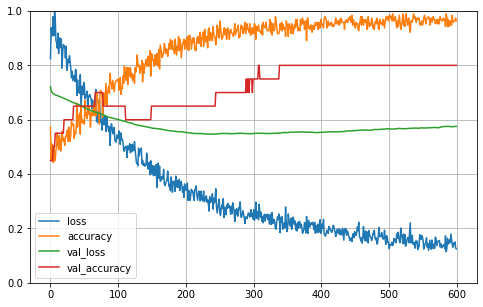

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

plt.gca().set_ylim(0,1)

In [19]:
plt.savefig('results/my_keras_model_ann.png',bbox_inches='tight')
model.save('my_keras_model_ann.h5')

<Figure size 432x288 with 0 Axes>

### Details about the model

In [20]:
model=keras.models.load_model('my_keras_model_ann.h5') 

model.summary()

for i, layer in enumerate (model.layers):
    print (i, layer)
    try:
        print ("    ",layer.activation)
    except AttributeError:
        print('   no activation attribute')
#specific info about each layer
for i in range(len(model.layers)):
    print(model.layers[i].get_config())
#info about optimizers
model.optimizer.get_config()       


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 182)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 182)               728       
_________________________________________________________________
dropout (Dropout)            (None, 182)               0         
_________________________________________________________________
dense (Dense)                (None, 6000)              1098000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 6000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              6001000   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1000)              4

{'name': 'Adam',
 'learning_rate': 4e-07,
 'decay': 0.0,
 'beta_1': 0.8,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}